# Waiting Time Forecast: EDA

## Imports and Dependencies

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load and Merge Data

In [89]:
data_dir = "../data"

attendance_file = "attendance.csv"
entity_file = "entity_schedule.csv"
link_attraction_file = "link_attraction_park.csv"
parade_file = "parade_night_show.xlsx"
waiting_file = "waiting_times.csv"
weather_file = "weather_data.csv"

In [90]:
attendance = pd.read_csv(os.path.join(data_dir, attendance_file))
closing = pd.read_csv(os.path.join(data_dir, entity_file))
link_attraction = pd.read_csv(os.path.join(data_dir, link_attraction_file), sep=";")
parade = pd.read_excel(os.path.join(data_dir, parade_file))
waiting = pd.read_csv(os.path.join(data_dir, waiting_file))
weather = pd.read_csv(os.path.join(data_dir, weather_file))

### 1.1 Attendance

In [91]:
attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [92]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     2367 non-null   object
 1   FACILITY_NAME  2367 non-null   object
 2   attendance     2367 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [93]:
attendance["FACILITY_NAME"].unique()

array(['PortAventura World', 'Tivoli Gardens'], dtype=object)

In [94]:
attendance["USAGE_DATE"] = pd.to_datetime(attendance["USAGE_DATE"], format="%Y-%m-%d")
attendance = attendance[attendance["FACILITY_NAME"] == "PortAventura World"]
attendance.drop(columns=["FACILITY_NAME"], inplace=True)
attendance

,USAGE_DATE,attendance
0,2018-06-01,46804
2,2018-06-02,57940
4,2018-06-03,44365
6,2018-06-04,37617
8,2018-06-05,32438
...,...,...
2357,2022-07-22,49586
2359,2022-07-23,51748
2361,2022-07-24,45261
2363,2022-07-25,53764


### 1.2 Attraction Park Mapping

In [95]:
link_attraction.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [96]:
link_attraction["PARK"].unique()

array(['Tivoli Gardens', 'PortAventura World'], dtype=object)

### 1.3 Closing

In [97]:
closing.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [98]:
closing = closing[closing["ENTITY_DESCRIPTION_SHORT"] != "Tivoli Gardens"]

In [99]:
closing = closing.merge(
    link_attraction,
    how="left",
    left_on="ENTITY_DESCRIPTION_SHORT",
    right_on="ATTRACTION",
).drop(columns=["ATTRACTION"])
closing

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,PARK
0,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,PortAventura World
1,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28,Tivoli Gardens
2,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11,Tivoli Gardens
3,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29,Tivoli Gardens
4,Fermeture Réhab,Top Spin,ATTR,2019-04-07 23:59:00.000,2019-04-07 23:59:00.000,2019-04-08 07:40:04.000,2019-04-07,Tivoli Gardens
...,...,...,...,...,...,...,...,...
36438,NaN,Log Flume,ATTR,2022-08-20 08:25:00.000,2022-08-20 23:09:00.000,2022-08-21 09:16:50.000,2022-08-20,Tivoli Gardens
36439,Fermeture Réhab,Giga Coaster,ATTR,2022-08-20 23:59:00.000,2022-08-20 23:59:00.000,2022-08-21 09:16:53.000,2022-08-20,PortAventura World
36440,NaN,Inverted Coaster,ATTR,2022-08-20 09:30:00.000,2022-08-20 17:48:00.000,2022-08-21 09:16:55.000,2022-08-20,PortAventura World
36441,NaN,Inverted Coaster,ATTR,2022-08-22 09:20:00.000,2022-08-22 17:54:00.000,2022-08-23 09:02:42.000,2022-08-22,PortAventura World


In [100]:
closing = closing[closing["PARK"] != "Tivoli Gardens"]
closing.drop(columns=["PARK"], inplace=True)

C:\Users\dorab\AppData\Local\Temp\ipykernel_25188\925142589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing.drop(columns=["PARK"], inplace=True)


In [101]:
closing.drop(columns=["UPDATE_TIME"], inplace=True)

closing["DEB_TIME"] = pd.to_datetime(closing["DEB_TIME"])
closing["FIN_TIME"] = pd.to_datetime(closing["FIN_TIME"])
closing["WORK_DATE"] = pd.to_datetime(closing["WORK_DATE"])

C:\Users\dorab\AppData\Local\Temp\ipykernel_25188\4213642292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing.drop(columns=["UPDATE_TIME"], inplace=True)
C:\Users\dorab\AppData\Local\Temp\ipykernel_25188\4213642292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing["DEB_TIME"] = pd.to_datetime(closing["DEB_TIME"])
C:\Users\dorab\AppData\Local\Temp\ipykernel_25188\4213642292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [102]:
closing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25215 entries, 0 to 36442
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REF_CLOSING_DESCRIPTION   2769 non-null   object        
 1   ENTITY_DESCRIPTION_SHORT  25215 non-null  object        
 2   ENTITY_TYPE               25215 non-null  object        
 3   DEB_TIME                  25215 non-null  datetime64[ns]
 4   FIN_TIME                  25215 non-null  datetime64[ns]
 5   WORK_DATE                 25215 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 1.3+ MB


### 1.4 Parade

In [103]:
parade.drop(columns=["Unnamed: 0"], inplace=True)
parade.head()

,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,20:00:00,17:30:00,12:10:00
1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2018-10-03,20:00:00,17:30:00,12:10:00
3,2018-10-04,20:00:00,17:30:00,12:10:00
4,2018-10-05,20:00:00,17:30:00,12:10:00


In [104]:
# Columns to adjust
time_columns = ["NIGHT_SHOW", "PARADE_1", "PARADE_2"]

# Update the time columns
for col in time_columns:
    parade[col] = pd.to_datetime(parade[col], format="%H:%M:%S").dt.time  # Extract time
    parade[col] = parade["WORK_DATE"] + pd.to_timedelta(
        parade[col].astype(str)
    )  # Combine WORK_DATE with time

# Ensure the final format is datetime
parade[time_columns] = parade[time_columns].apply(pd.to_datetime)

In [105]:
parade

,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,2018-10-01 20:00:00,2018-10-01 17:30:00,2018-10-01 12:10:00
1,2018-10-02,2018-10-02 20:00:00,2018-10-02 17:30:00,2018-10-02 12:10:00
2,2018-10-03,2018-10-03 20:00:00,2018-10-03 17:30:00,2018-10-03 12:10:00
3,2018-10-04,2018-10-04 20:00:00,2018-10-04 17:30:00,2018-10-04 12:10:00
4,2018-10-05,2018-10-05 20:00:00,2018-10-05 17:30:00,2018-10-05 12:10:00
...,...,...,...,...
666,2022-08-14,2022-08-14 23:00:00,2022-08-14 17:30:00,NaT
667,2022-08-15,2022-08-15 23:00:00,2022-08-15 17:30:00,NaT
668,2022-08-16,2022-08-16 23:00:00,2022-08-16 17:30:00,NaT
669,2022-08-17,2022-08-17 23:00:00,2022-08-17 17:30:00,NaT


In [106]:
parade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   WORK_DATE   671 non-null    datetime64[ns]
 1   NIGHT_SHOW  671 non-null    datetime64[ns]
 2   PARADE_1    671 non-null    datetime64[ns]
 3   PARADE_2    190 non-null    datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 21.1 KB


### 1.5 Waiting

In [107]:
waiting

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00.000,18,2022-08-18 19:00:00.000,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509320,2022-08-18,2022-08-18 10:15:00.000,10,2022-08-18 10:30:00.000,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509321,2022-08-18,2022-08-18 09:15:00.000,9,2022-08-18 09:30:00.000,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0
3509322,2022-08-18,2022-08-18 20:30:00.000,20,2022-08-18 20:45:00.000,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0


In [108]:
waiting["WORK_DATE"] = pd.to_datetime(waiting["WORK_DATE"], format="%Y-%m-%d")
waiting["FIN_TIME"] = pd.to_datetime(waiting["FIN_TIME"], format="%Y-%m-%d %H:%M:%S.%f")
waiting["DEB_TIME"] = pd.to_datetime(waiting["DEB_TIME"], format="%Y-%m-%d %H:%M:%S.%f")

waiting.drop(columns=["FIN_TIME"], inplace=True)

In [109]:
waiting = waiting.merge(
    link_attraction,
    how="left",
    left_on="ENTITY_DESCRIPTION_SHORT",
    right_on="ATTRACTION",
).drop(columns=["ATTRACTION"])
waiting = waiting[waiting["PARK"] == "PortAventura World"]

In [110]:
waiting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369821 entries, 0 to 3509323
Data columns (total 14 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   WORK_DATE                 datetime64[ns]
 1   DEB_TIME                  datetime64[ns]
 2   DEB_TIME_HOUR             int64         
 3   ENTITY_DESCRIPTION_SHORT  object        
 4   WAIT_TIME_MAX             int64         
 5   NB_UNITS                  float64       
 6   GUEST_CARRIED             float64       
 7   CAPACITY                  float64       
 8   ADJUST_CAPACITY           float64       
 9   OPEN_TIME                 int64         
 10  UP_TIME                   int64         
 11  DOWNTIME                  int64         
 12  NB_MAX_UNIT               float64       
 13  PARK                      object        
dtypes: datetime64[ns](2), float64(5), int64(5), object(2)
memory usage: 271.2+ MB


### 1.6 Merge DataFrames

#### 1.6.1 Waiting with Parade

In [111]:
parade

,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,2018-10-01 20:00:00,2018-10-01 17:30:00,2018-10-01 12:10:00
1,2018-10-02,2018-10-02 20:00:00,2018-10-02 17:30:00,2018-10-02 12:10:00
2,2018-10-03,2018-10-03 20:00:00,2018-10-03 17:30:00,2018-10-03 12:10:00
3,2018-10-04,2018-10-04 20:00:00,2018-10-04 17:30:00,2018-10-04 12:10:00
4,2018-10-05,2018-10-05 20:00:00,2018-10-05 17:30:00,2018-10-05 12:10:00
...,...,...,...,...
666,2022-08-14,2022-08-14 23:00:00,2022-08-14 17:30:00,NaT
667,2022-08-15,2022-08-15 23:00:00,2022-08-15 17:30:00,NaT
668,2022-08-16,2022-08-16 23:00:00,2022-08-16 17:30:00,NaT
669,2022-08-17,2022-08-17 23:00:00,2022-08-17 17:30:00,NaT


In [112]:
parade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   WORK_DATE   671 non-null    datetime64[ns]
 1   NIGHT_SHOW  671 non-null    datetime64[ns]
 2   PARADE_1    671 non-null    datetime64[ns]
 3   PARADE_2    190 non-null    datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 21.1 KB


In [113]:
waiting = waiting.merge(
    parade,
    left_on="WORK_DATE",
    right_on="WORK_DATE",
    how="left",
)
waiting

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,PARK,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-01-01,2018-01-01 21:00:00,21,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World,NaT,NaT,NaT
1,2018-01-01,2018-01-01 19:30:00,19,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,PortAventura World,NaT,NaT,NaT
2,2018-01-01,2018-01-01 22:30:00,22,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World,NaT,NaT,NaT
3,2018-01-01,2018-01-01 12:45:00,12,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,PortAventura World,NaT,NaT,NaT
4,2018-01-01,2018-01-01 18:15:00,18,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0,PortAventura World,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,2022-08-18 23:00:00,2022-08-18 17:30:00,NaT
2369817,2022-08-18,2022-08-18 10:15:00,10,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,2022-08-18 23:00:00,2022-08-18 17:30:00,NaT
2369818,2022-08-18,2022-08-18 09:15:00,9,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,2022-08-18 23:00:00,2022-08-18 17:30:00,NaT
2369819,2022-08-18,2022-08-18 20:30:00,20,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0,PortAventura World,2022-08-18 23:00:00,2022-08-18 17:30:00,NaT


In [114]:
for col in ["NIGHT_SHOW", "PARADE_1", "PARADE_2"]:
    start_time = waiting[col]
    end_time = start_time + pd.Timedelta(minutes=20)
    waiting[col] = np.where(
        (waiting["DEB_TIME"] >= start_time) & (waiting["DEB_TIME"] < end_time), 1, 0
    )

In [115]:
waiting

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,PARK,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-01-01,2018-01-01 21:00:00,21,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World,0,0,0
1,2018-01-01,2018-01-01 19:30:00,19,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,PortAventura World,0,0,0
2,2018-01-01,2018-01-01 22:30:00,22,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World,0,0,0
3,2018-01-01,2018-01-01 12:45:00,12,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,PortAventura World,0,0,0
4,2018-01-01,2018-01-01 18:15:00,18,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0,PortAventura World,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,0,0,0
2369817,2022-08-18,2022-08-18 10:15:00,10,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,0,0,0
2369818,2022-08-18,2022-08-18 09:15:00,9,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,0,0,0
2369819,2022-08-18,2022-08-18 20:30:00,20,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0,PortAventura World,0,0,0


#### 1.6.2 Waiting with Attendance

In [116]:
waiting.describe()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,NIGHT_SHOW,PARADE_1,PARADE_2
count,2369821,2369821,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06,2.369821e+06
mean,2020-04-26 09:12:15.991283712,2020-04-27 01:04:45.947420160,1.549998e+01,1.265171e+01,1.051284e+01,8.070589e+01,1.752379e+02,1.549698e+02,8.056178e+00,7.751566e+00,3.046116e-01,1.603548e+01,8.915863e-03,1.421036e-02,3.038204e-03
min,2018-01-01 00:00:00,2018-01-01 09:00:00,9.000000e+00,0.000000e+00,-1.000000e+00,-6.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019-02-28 00:00:00,2019-02-28 14:15:00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2020-04-27 00:00:00,2020-04-27 09:00:00,1.600000e+01,5.000000e+00,2.000000e+00,1.800000e+01,7.500000e+01,7.500000e+01,1.500000e+01,1.500000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2021-06-24 00:00:00,2021-06-24 16:15:00,1.900000e+01,2.000000e+01,1.100000e+01,1.380000e+02,3.067500e+02,2.547500e+02,1.500000e+01,1.500000e+01,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,2022-08-18 00:00:00,2022-08-18 22:45:00,2.200000e+01,3.000000e+02,1.300000e+02,1.500000e+04,7.560000e+02,7.560000e+02,1.500000e+01,1.500000e+01,3.000000e+01,1.300000e+02,1.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,4.031101e+00,1.999859e+01,2.316212e+01,1.156726e+02,2.084763e+02,1.919896e+02,7.442102e+00,7.430967e+00,2.011046e+00,2.890514e+01,9.400199e-02,1.183572e-01,5.503612e-02


In [ ]:
waiting = (
    waiting.merge(
        attendance,

        how="left",
        left_on="WORK_DATE",
        right_on="USAGE_DATE",
    )
    .drop(columns=["USAGE_DATE"])
    .rename({"attendance": "daily_attendance"}, axis=1)
)

waiting

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,PARK,NIGHT_SHOW,PARADE_1,PARADE_2,daily_attendance
0,2018-01-01,2018-01-01 21:00:00,21,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World,0,0,0,NaN
1,2018-01-01,2018-01-01 19:30:00,19,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,PortAventura World,0,0,0,NaN
2,2018-01-01,2018-01-01 22:30:00,22,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,PortAventura World,0,0,0,NaN
3,2018-01-01,2018-01-01 12:45:00,12,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,PortAventura World,0,0,0,NaN
4,2018-01-01,2018-01-01 18:15:00,18,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0,PortAventura World,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,0,0,0,NaN
2369817,2022-08-18,2022-08-18 10:15:00,10,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,0,0,0,NaN
2369818,2022-08-18,2022-08-18 09:15:00,9,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,PortAventura World,0,0,0,NaN
2369819,2022-08-18,2022-08-18 20:30:00,20,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0,PortAventura World,0,0,0,NaN


#### 1.6.3 Waiting with Weather

In [132]:
def merge_nearest_weather(waiting_times_df, weather_df):
    """
    Merge weather data to waiting times based on closest timestamp match

    Parameters:
    waiting_times_df (pd.DataFrame): DataFrame with DEB_TIME column
    weather_df (pd.DataFrame): DataFrame with dt_iso and weather metrics

    Returns:
    pd.DataFrame: waiting_times_df with added weather columns
    """
    # Make a copy to avoid modifying original
    result_df = waiting_times_df.copy()

    # Convert waiting times to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(result_df["DEB_TIME"]):
        result_df["DEB_TIME"] = pd.to_datetime(result_df["DEB_TIME"])

    # Clean and convert weather timestamps
    # Remove the "+0000 UTC" part and convert to datetime
    weather_df = weather_df.copy()
    weather_df["dt_iso_clean"] = weather_df["dt_iso"].str.replace(" +0000 UTC", "")
    weather_df["dt_iso_clean"] = pd.to_datetime(weather_df["dt_iso_clean"])

    # Create arrays of timestamps for efficient searching
    wait_times = result_df["DEB_TIME"].values.astype("datetime64[s]")
    weather_times = weather_df["dt_iso_clean"].values.astype("datetime64[s]")

    # Find indices of nearest weather timestamps for each waiting time
    nearest_idx = []
    for t in wait_times:
        # Convert to int64 for numerical comparison
        time_diffs = abs(weather_times.astype("int64") - t.astype("int64"))
        nearest_idx.append(time_diffs.argmin())

    # Add weather data columns to result
    weather_columns = ["dew_point", "feels_like", "rain_1h", "snow_1h", "clouds_all"]
    for col in weather_columns:
        result_df[col] = weather_df[col].values[nearest_idx]

    # Add the matched timestamp for reference
    result_df["weather_timestamp"] = weather_df["dt_iso_clean"].values[nearest_idx]

    return result_df

In [ ]:
waiting = merge_nearest_weather(waiting, weather)
waiting

#### 1.6.4 Waiting with Closing (Entity)

In [ ]:
def process_closures(waiting_times, entity_schedule, chunk_size=100000):
    """
    Memory-efficient version for processing attraction closures
    """
    # Convert dates once at the start if needed
    if not pd.api.types.is_datetime64_any_dtype(waiting_times["DEB_TIME"]):
        waiting_times["DEB_TIME"] = pd.to_datetime(waiting_times["DEB_TIME"])
    if not pd.api.types.is_datetime64_any_dtype(entity_schedule["DEB_TIME"]):
        entity_schedule["DEB_TIME"] = pd.to_datetime(entity_schedule["DEB_TIME"])
        entity_schedule["FIN_TIME"] = pd.to_datetime(entity_schedule["FIN_TIME"])

    # Create schedule lookup dictionary for faster processing
    schedule_dict = {}
    for _, row in entity_schedule.iterrows():
        entity = row["ENTITY_DESCRIPTION_SHORT"]
        if entity not in schedule_dict:
            schedule_dict[entity] = []
        schedule_dict[entity].append(
            {
                "deb": row["DEB_TIME"],
                "fin": row["FIN_TIME"],
                "desc": row["REF_CLOSING_DESCRIPTION"],
            }
        )

    # Initialize results with minimal memory
    result_df = waiting_times.copy()
    result_df["is_closed"] = 0
    result_df["REF_CLOSING_DESCRIPTION"] = None
    result_df["simultaneous_closures"] = 0

    # Process in chunks to avoid memory issues
    for start_idx in range(0, len(waiting_times), chunk_size):
        end_idx = min(start_idx + chunk_size, len(waiting_times))
        chunk = waiting_times.iloc[start_idx:end_idx]

        # Process closures for this chunk
        for idx, row in chunk.iterrows():
            entity = row["ENTITY_DESCRIPTION_SHORT"]
            deb_time = row["DEB_TIME"]

            if entity in schedule_dict:
                for schedule in schedule_dict[entity]:
                    if schedule["deb"] <= deb_time <= schedule["fin"]:
                        result_df.loc[idx, "is_closed"] = 1
                        result_df.loc[idx, "REF_CLOSING_DESCRIPTION"] = schedule["desc"]
                        break

    # Calculate simultaneous closures in chunks
    unique_times = result_df["DEB_TIME"].unique()
    closure_counts = {}

    for time in unique_times:
        mask = result_df["DEB_TIME"] == time
        closure_counts[time] = result_df.loc[mask, "is_closed"].sum()

    result_df["simultaneous_closures"] = result_df["DEB_TIME"].map(closure_counts)

    return result_df

In [ ]:
waiting = process_closures(waiting, closing)
waiting

## 2. Preprocessing and EDA
### 2.1 Attendance

In [118]:
attendance.describe()

,USAGE_DATE,attendance
count,1182,1182.000000
mean,2020-05-20 17:56:57.258883328,34796.605753
min,2018-06-01 00:00:00,-9991.000000
25%,2019-03-23 06:00:00,21701.000000
50%,2020-01-12 12:00:00,35672.500000
75%,2021-10-03 18:00:00,49563.500000
max,2022-07-26 00:00:00,80642.000000
std,NaN,18325.289439


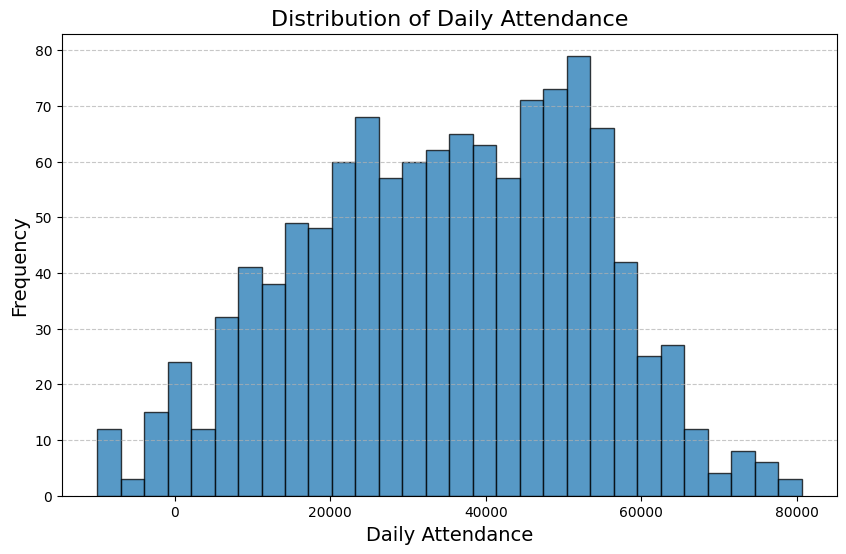

In [119]:
# Assuming `attendance` DataFrame contains a column named "attendance"
plt.figure(figsize=(10, 6))
plt.hist(attendance["attendance"], bins=30, alpha=0.75, edgecolor="black")
plt.title("Distribution of Daily Attendance", fontsize=16)
plt.xlabel("Daily Attendance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [120]:
attendance["month"] = attendance["USAGE_DATE"].dt.month
attendance["day"] = attendance["USAGE_DATE"].dt.day
attendance

,USAGE_DATE,attendance,month,day
0,2018-06-01,46804,6,1
2,2018-06-02,57940,6,2
4,2018-06-03,44365,6,3
6,2018-06-04,37617,6,4
8,2018-06-05,32438,6,5
...,...,...,...,...
2357,2022-07-22,49586,7,22
2359,2022-07-23,51748,7,23
2361,2022-07-24,45261,7,24
2363,2022-07-25,53764,7,25


In [121]:
attendance[attendance["attendance"] <= 0]

,USAGE_DATE,attendance,month,day
1304,2020-07-08,-9914,7,8
1306,2020-07-10,-9959,7,10
1308,2020-07-11,-4108,7,11
1310,2020-07-12,-3004,7,12
1412,2020-09-01,-792,9,1
1416,2020-09-03,-788,9,3
1418,2020-09-04,-755,9,4
1424,2020-09-07,-844,9,7
1438,2020-09-14,-2474,9,14
1440,2020-09-15,-2571,9,15


In [122]:
attendance = attendance[attendance["attendance"] > 0]
attendance

,USAGE_DATE,attendance,month,day
0,2018-06-01,46804,6,1
2,2018-06-02,57940,6,2
4,2018-06-03,44365,6,3
6,2018-06-04,37617,6,4
8,2018-06-05,32438,6,5
...,...,...,...,...
2357,2022-07-22,49586,7,22
2359,2022-07-23,51748,7,23
2361,2022-07-24,45261,7,24
2363,2022-07-25,53764,7,25


In [123]:
grouped_attendance = attendance.groupby(["month", "day"]).mean().reset_index()

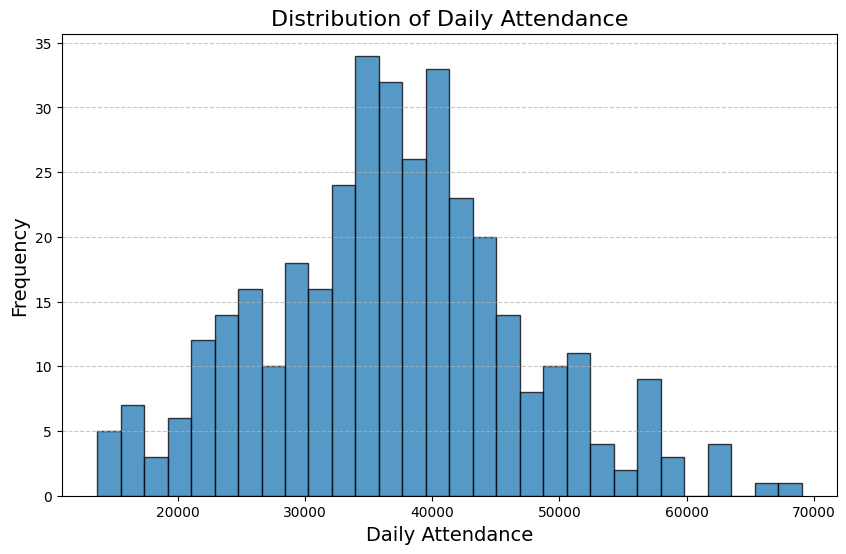

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(grouped_attendance["attendance"], bins=30, alpha=0.75, edgecolor="black")
plt.title("Distribution of Daily Attendance", fontsize=16)
plt.xlabel("Daily Attendance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [125]:
test = attendance[(attendance["attendance"] >= 0) & (attendance["attendance"] <= 10000)]
test

,USAGE_DATE,attendance,month,day
470,2019-01-22,8773,1,22
472,2019-01-23,8601,1,23
486,2019-01-30,9421,1,30
1312,2020-07-13,4693,7,13
1314,2020-07-14,4054,7,14
...,...,...,...,...
2005,2022-01-27,6064,1,27
2007,2022-01-28,8421,1,28
2015,2022-02-01,5947,2,1
2017,2022-02-02,7797,2,2


In [130]:
test = waiting[(waiting["OPEN_TIME"] == 0) & (waiting["WAIT_TIME_MAX"] == 0)]
test

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,PARK,NIGHT_SHOW,PARADE_1,PARADE_2,daily_attendance
0,2018-01-01,2018-01-01 21:00:00,21,Roller Coaster,0,2.0,0.0,0.0,0.0,0,0,0,2.0,PortAventura World,0,0,0,NaN
2,2018-01-01,2018-01-01 22:30:00,22,Rapids Ride,0,1.0,0.0,0.0,0.0,0,0,0,2.0,PortAventura World,0,0,0,NaN
9,2018-01-01,2018-01-01 19:30:00,19,Superman Ride,0,2.0,0.0,0.0,0.0,0,0,0,3.0,PortAventura World,0,0,0,NaN
11,2018-01-01,2018-01-01 22:30:00,22,Inverted Coaster,0,1.0,0.0,0.0,0.0,0,0,0,3.0,PortAventura World,0,0,0,NaN
15,2018-01-01,2018-01-01 20:15:00,20,Roller Coaster,0,2.0,0.0,0.0,0.0,0,0,0,2.0,PortAventura World,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,Himalaya Ride,0,0.0,0.0,0.0,0.0,0,0,0,1.0,PortAventura World,0,0,0,NaN
2369817,2022-08-18,2022-08-18 10:15:00,10,Crazy Dance,0,0.0,0.0,0.0,0.0,0,0,0,1.0,PortAventura World,0,0,0,NaN
2369818,2022-08-18,2022-08-18 09:15:00,9,Crazy Dance,0,0.0,0.0,0.0,0.0,0,0,0,1.0,PortAventura World,0,0,0,NaN
2369819,2022-08-18,2022-08-18 20:30:00,20,Giga Coaster,0,0.0,0.0,0.0,0.0,0,0,0,24.0,PortAventura World,0,0,0,NaN
